# Haberman's Survival Data Set 
   
   ## Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to     1970 for the patients who undergo surgery of breast cancer.
   
   ## Attribute information:
   ## 1) Age of patient at the time of operation
   ## 2) Patient's year of operation
   ## 3) Number of positive axillay nodes detected (Lymph nodes)
          Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.
          
   ## 4) Survival Status
          1 = Patient survived 5 years or longer.
          2 = Patient dies within 5 years.
          
          

## Objective : Our objective is to perform EDA on this dataset to get high level statistics of data and to perform various analysis to understand what features of the dataset are useful for  classification.

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("haberman.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


The data set has 4 attributes and each attribute has 306 non-null observations.

Thus the shape of our data set is (306,4).

In [ ]:
df["age"].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

The age of the patients range from 30 to 83 years

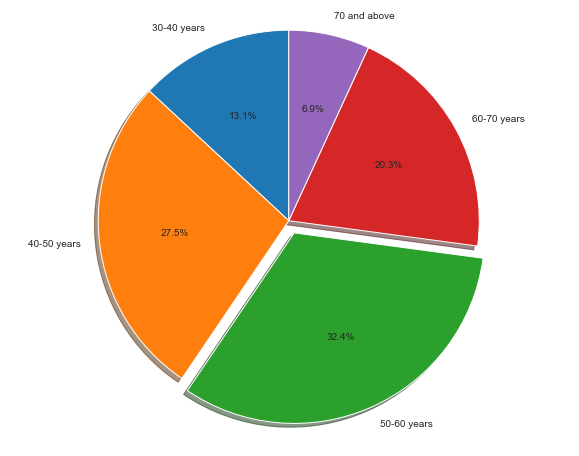

In [ ]:
# Calculating percentage of individual age groups
thirty_and_fourty = (df[(df["age"] >= 30) & (df["age"] < 40)]["age"].count() * 100)/df["age"].count()
fourty_and_fifty = (df[(df["age"] >= 40) & (df["age"] < 50)]["age"].count()*100)/df["age"].count()
fifty_and_sixty = (df[(df["age"] >= 50) & (df["age"] < 60)]["age"].count()*100)/df["age"].count()
sixty_and_seventy = (df[(df["age"] >= 60) & (df["age"] < 70)]["age"].count()*100)/df["age"].count()
seventy_and_eighty = (df[df["age"] >= 70]["age"].count()*100)/df["age"].count()


# Code for drawing pie chart
labels = ["30-40 years","40-50 years","50-60 years","60-70 years","70 and above"]
sizes = [thirty_and_fourty, fourty_and_fifty, fifty_and_sixty, sixty_and_seventy, seventy_and_eighty]
explode = (0, 0, 0.07, 0, 0) 
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, labels = labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Of all the patients the highest number of patients (32.4 %) come from the age group of 50-60 years.

People from age group of 70 and above are the least (6.9 %) to be operated on which means there is a less chance of detection of cancer in this age group.

[]

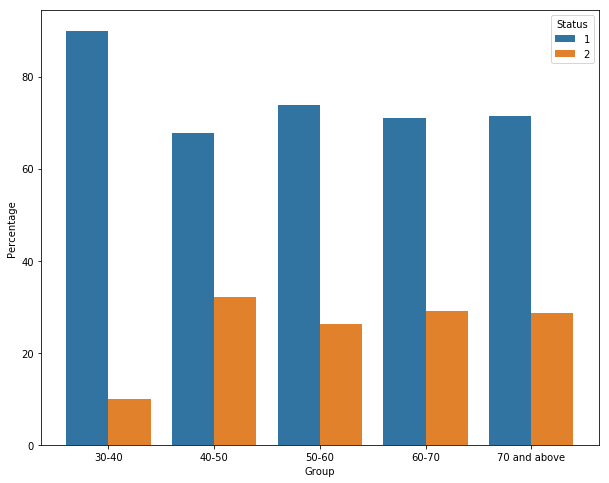

In [ ]:
# Calculating the count of status 1 and status 2 patients in each age group
thirty_and_fourtys1 = df[((df["age"] >= 30) & (df["age"] < 40)) & (df["status"]==1)]["status"].count() 
thirty_and_fourtys2 = df[((df["age"] >= 30) & (df["age"] < 40)) & (df["status"]==2)]["status"].count()
fourty_and_fiftys1 = df[((df["age"] >= 40) & (df["age"] < 50)) & (df["status"]==1)]["status"].count() 
fourty_and_fiftys2 = df[((df["age"] >= 40) & (df["age"] < 50)) & (df["status"]==2)]["status"].count() 
fifty_and_sixtys1 = df[((df["age"] >= 50) & (df["age"] < 60)) & (df["status"]==1)]["status"].count() 
fifty_and_sixtys2 = df[((df["age"] >= 50) & (df["age"] < 60)) & (df["status"]==2)]["status"].count()
sixty_and_seventys1 = df[((df["age"] >= 60) & (df["age"] < 70)) & (df["status"]==1)]["status"].count()
sixty_and_seventys2 = df[((df["age"] >= 60) & (df["age"] < 70)) & (df["status"]==2)]["status"].count() 
seventy_and_eightys1 = df[(df["age"] >= 70) & (df["status"]==1)]["status"].count()
seventy_and_eightys2 = df[(df["age"] >= 70) & (df["status"]==2)]["status"].count()

# Calculating the percentage of survival status in each age group
per_30_40s1 = (thirty_and_fourtys1 * 100) / (thirty_and_fourtys1 + thirty_and_fourtys2)
per_30_40s2 = 100.00 - per_30_40s1
per_40_50s1 = (fourty_and_fiftys1 * 100) / (fourty_and_fiftys1 + fourty_and_fiftys2)
per_40_50s2 = 100.00 - per_40_50s1
per_50_60s1 = (fifty_and_sixtys1 * 100) / (fifty_and_sixtys1 + fifty_and_sixtys2)
per_50_60s2 = 100.00 - per_50_60s1
per_60_70s1 = (sixty_and_seventys1 * 100) / (sixty_and_seventys1 + sixty_and_seventys2)
per_60_70s2 = 100.00 - per_60_70s1
per_70_s1 = (seventy_and_eightys1 * 100) / (seventy_and_eightys1 + seventy_and_eightys2)
per_70_s2 = 100.00 - per_70_s1

# Code for the the plot
group = ["30-40", "30-40","40-50","40-50","50-60","50-60","60-70","60-70","70 and above","70 and above"]

percentage = [per_30_40s1, per_30_40s2, per_40_50s1,per_40_50s2, per_50_60s1, per_50_60s2, per_60_70s1, per_60_70s2,
              per_70_s1, per_70_s2]

status = [1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

df_new = pd.DataFrame({"Group" : group, "Percentage" : percentage, "Status" : status})
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(ax = ax, x = "Group", y = "Percentage", hue = "Status", data = df_new)
ax.plot()



If patients undergo an operation in the age of 30-40 years they have the highest chance at survival (90%).

40-50 years of aged patient are the least likely to survive relative to other age groups.

The older age groups (60-70, 70 and above) have the same amount of status 1 and status 2 patients and the plots show they have a better chance of making it to status 2 which proves that "Age" may not be a deciding factor for a patient's survival after surgey.

## 2-D Scatter plots

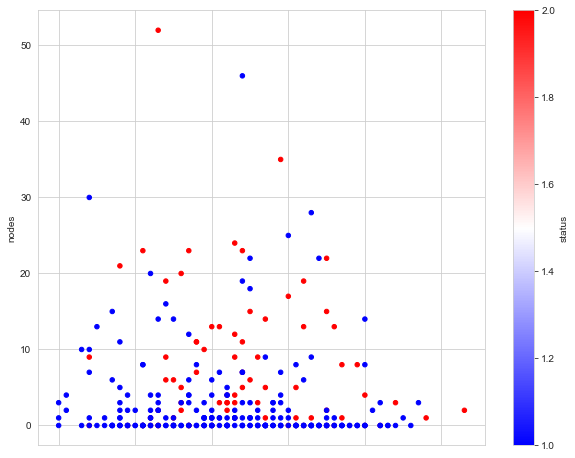

In [ ]:
df.plot(kind="scatter",x="age",xticks=[30,40,50,60,70,80],y="nodes",c="status",legend=True, figsize=(10,8), colormap="bwr",colorbar=True)

The X axis is the age and the scale is 10 starting from 30. Pandas is having bugs in df.plot() function where the X axis disappears on using scatter plot.

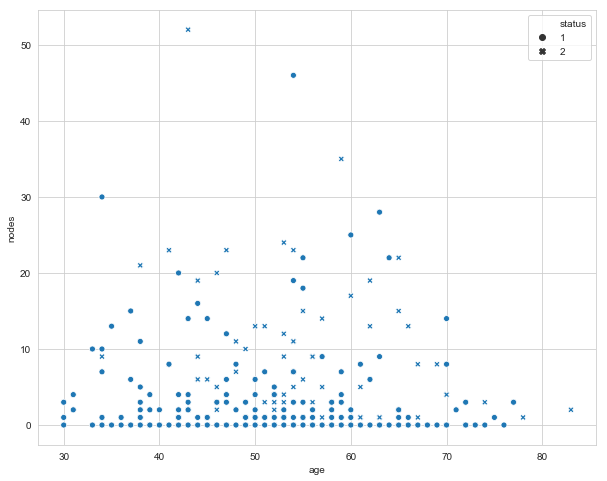

In [ ]:
import random
fig, ax = plt.subplots(figsize=(10,8))
markers = {1:"o",2:"X"}
plot = sns.scatterplot(x = "age", y = "nodes", style = "status", markers = markers, data = df, ax = ax)

Above shown are Scatter plots of patient's age and the number of lymph nodes found in the body along with their survival status.

Following are the observations from the above plots:

1) There is an increase in the number of positive axillary nodes in patient's body as we move towards the X-axis.

2) Patient's from all age groups who had lymph nodes less than 10 have a higher survival chance.

3) All the patients from all age groups have survival status 1 (more than 5 years) who had 0 positive axillary nodes.

4) From the age group of 40 to 80 if the number of nodes is more than 10 then their survival chance decreases relative to     patients who have lesser positive axillary nodes 

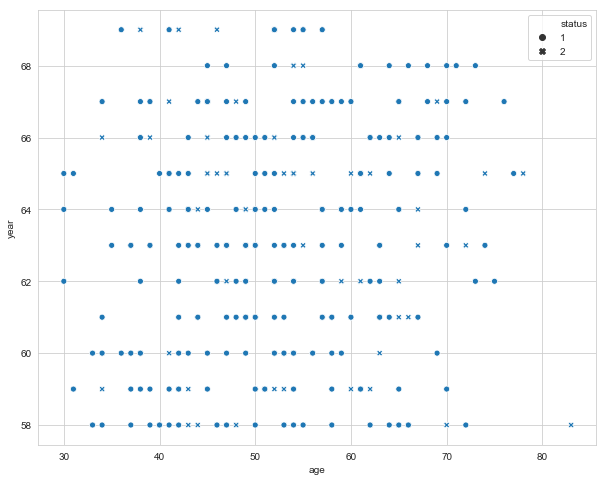

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x = "age", y = "year", style = "status", markers = markers, data = df, ax = ax)

Of all the operations that were performed in 1965, 10 patients died within 5 years which is the highest number of deaths in all years.

From the 10 patients, 4 were from the age of 50-60 years which is the highest number of deaths within 5 years for any age group in all years.

## Pair Plots

c:\users\shibby\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


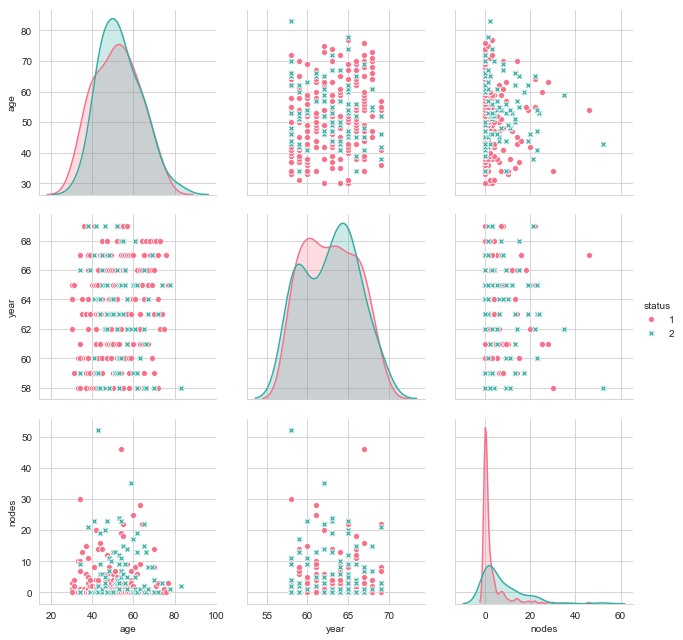

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data = df, hue="status", vars = ("age", "year", "nodes"), palette="husl", markers=["o", "X"], height = 3)

There are huge overlaps in every plot and nothing much can be figured out of them.

We already saw a zoomed in version of plot number 3 and 7 earlier.Plot number 7 is basically an inverse plotting of plot number 3 where only the x-axis and the y-axis have been interchanged.

Similarly we already saw plot number 4 earlier and drew insights from it.Plot number 2 is inverse of the same.

## Univariate analysis, Histograms and PDF 

c:\users\shibby\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


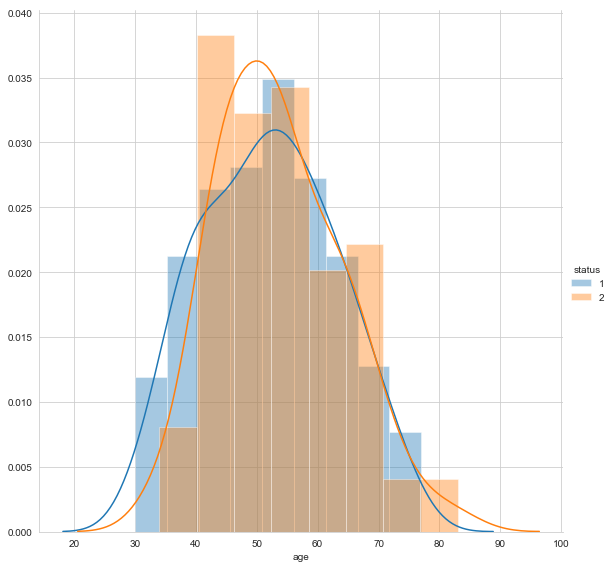

In [ ]:
# The following code for histograms has been taken from Applied AI course.

sns.FacetGrid(df, hue = "status", height = 8) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

The height of the plot here represents how often does a value of age for status 1 and status 2 occurs in the data set.

Here for status 1 the most frequent occuring age is nearly 55.

For status 2 the most frequent occuring age in the data set is around 40 to 45.

c:\users\shibby\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\shibby\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


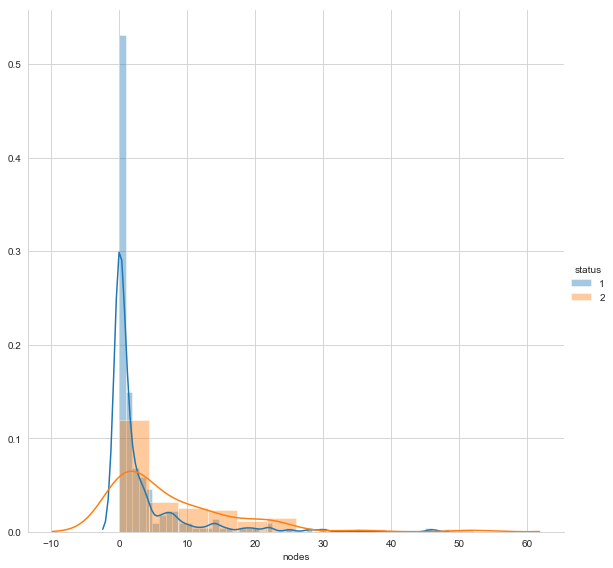

In [ ]:
# The following code for histograms has been taken from Applied AI course.

sns.FacetGrid(df, hue = "status", size = 8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

The most frequent occuring value for detection of positive axillary nodes for surviving patients is 0 in the graph and the peak of the histogram decreases with increase in the number of nodes which means more the presence of positive axillary nodes, more is the chance of a person not surviving after the operation.

Large number of the patients with survival status 2 have 5 or more than 5 positive axillary nodes detected under their forearm. 

## CDF

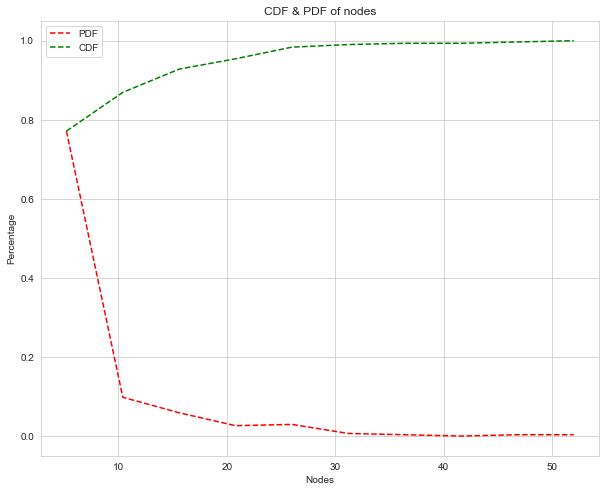

In [ ]:
counts, bins = np.histogram(df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

fig, ax = plt.subplots(figsize = (10, 8))
plt.title("CDF & PDF of nodes")
plt.xlabel("Nodes")
plt.ylabel("Percentage")
plt.plot(bins[1:], pdf, "r--", label = "PDF")
plt.plot(bins[1:], cdf, "g--", label = "CDF")
ax.legend()
plt.show();

The above CDF shows that around 82% of patients had less than 10 positive axillary nodes detected in their bodies.

There were less patients and no patients with more than 30 and around 52 nodes respectively which tells us presence of 30 positive axillary nodes in the body can be an extreme case.




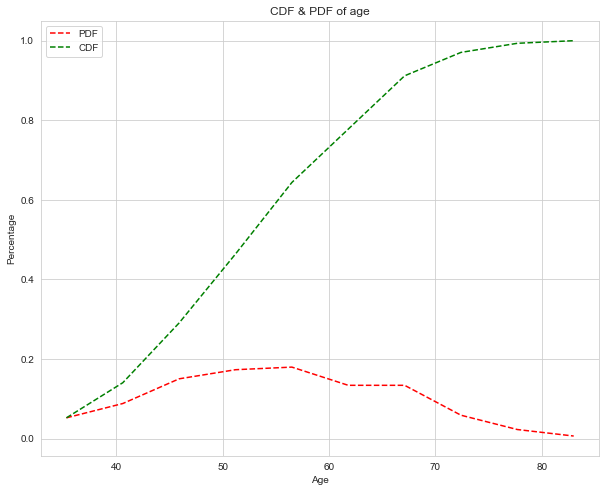

In [ ]:
counts, bins = np.histogram(df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

fig, ax = plt.subplots(figsize = (10, 8))
plt.title("CDF & PDF of age")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.plot(bins[1:], pdf, "r--", label = "PDF")
plt.plot(bins[1:], cdf, "g--", label = "CDF")
ax.legend()
plt.show();

The decreasing peak in the PDF Curve above shows that after 60 years of age people are less likely to undergo a breast cancer operation which ultimately means people are less likely to be diagnosed of breast cancer after 55 years of age.

CDF in the plot shows that 75% of the patients are below the age of 60 years and only about 1% are above 75 years.

The highest number of patients are in the age of 50-60 years.

## Box plots, Violin plots

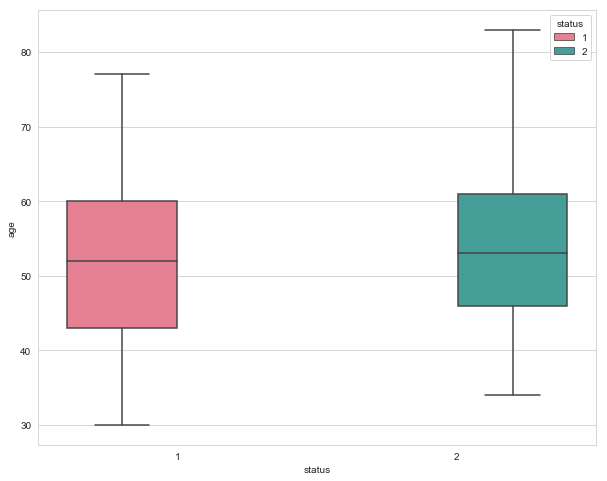

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = "status", y = "age", hue = "status", palette="husl", data = df)

50% of observations in Status 1 lie in the range of 43 to 60.

The 75th percentile of both the survival status is at same value, i.e. 60.

Of all the patients who don't survive long after breast cancer operation die in the age of 48 to 60 years.

The maximum limit of Status 1 box is around 78 years and that of Status 2 box is more than 80 years which proves that patients of above 80 years of age never survive more than 5 years after their operation.

The minimum limit of Status 1 box is 30 years and that of Status 2 box is around 33 years which proves that all the patients between 30 to 33 years of age are going to survive more than 5 years after they undergo operation.

c:\users\shibby\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


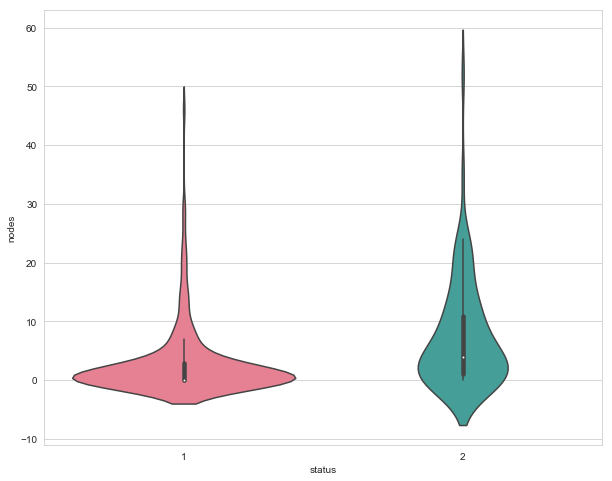

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x = "status", y = "nodes", palette = "husl", data = df)

The 75th percentile of number of nodes present in patient is less than 10 for status 1 patients and 25 for status 2 patients.

There are very less number of patients in Status 1 who have more than 10 nodes and there are a considerable amount of patients in Status 2 survival who have 10-30 positive axillary nodes. 

The median value of nodes for status 1 patients is 0 and status 2 patients is 4.



## Statistics about the data

In [ ]:
# Mean and standard deviation of the age
print("\n")
print("The average age of the patient in the dataset: ", df["age"].mean())
print("The deviation of age from the mean in the dataset: ", np.std(df["age"]))

# The average number of nodes for each of the survival status
print("\n")
print("The average number of nodes for survival status 1: ", np.mean(df["status"]==1))
print("The average number of nodes for survival status 2: ", np.mean(df["status"]==2))

# The standard deviation of nodes from mean
print("\n")
print("The deviation of nodes for survival status 1: ", np.std(df["status"]==1))
print("The deviation of nodes for survival status 2: ", np.std(df["status"]==2))

# Median
print("\n")
print("The median of the age is: ", np.median(df["age"]))
print("The median of the nodes is: ", np.median(df["nodes"]))

# Quantiles
print("\n")
print("The 0th, 25th, 50th, 75th percentile for age: ", np.percentile(df["age"],np.arange(0, 100, 25)))
print("The 0th, 25th, 50th, 75th percentile for nodes: ", np.percentile(df["nodes"],np.arange(0, 100, 25)))
print("The 0th, 25th, 50th, 75th percentile for year of operation: ", np.percentile(df["year"],np.arange(0, 100, 25)))

# 90th percentile
print("\n")
print("The 90th percentile for age: ", np.percentile(df["age"],90))
print("The 90th percentile for nodes: ", np.percentile(df["nodes"],90))
print("The 90th percentile for year: ", np.percentile(df["year"],90))

from statsmodels import robust
# Mean absolute deviation
print("\n")
print("The mean absolute deviation of age: ", robust.mad(df["age"]))
print("The mean absolute deviation of nodes: ", robust.mad(df["nodes"]))



The average age of the patient in the dataset:  52.45751633986928
The deviation of age from the mean in the dataset:  10.785785203631832


The average number of nodes for survival status 1:  0.7352941176470589
The average number of nodes for survival status 2:  0.2647058823529412


The deviation of nodes for survival status 1:  0.4411764705882353
The deviation of nodes for survival status 2:  0.4411764705882353


The median of the age is:  52.0
The median of the nodes is:  1.0


The 0th, 25th, 50th, 75th percentile for age:  [30.   44.   52.   60.75]
The 0th, 25th, 50th, 75th percentile for nodes:  [0. 0. 1. 4.]
The 0th, 25th, 50th, 75th percentile for year of operation:  [58.   60.   63.   65.75]


The 90th percentile for age:  67.0
The 90th percentile for nodes:  13.0
The 90th percentile for year:  67.0


The mean absolute deviation of age:  11.860817748044816
The mean absolute deviation of nodes:  1.482602218505602


# Conclusion: 
## From the above analysis we can conclude that the age of the patient and the number of positive axillary nodes detected in the patient are the two most important features in predicting whether a patient is going to survive after the breast cancer operation for more than 5 years or less than 5 years.